<div style="padding:20px; 
            color:#150d0a;
            margin:0px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color: #90EE90;
            overflow:hidden;
            font-weight:500;
            border-radius: 0;">
    Project & Dataset Overview</div>
    <center>
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b8/White_Blood_Cells.svg/1024px-White_Blood_Cells.svg.png?20240925211923" width="400" style="margin-top: 20px;">
</center>


Here we will be analyzing a dataset of Peripheral Blood Mononuclear Cells (PBMC).There are 2,700 single cells that were sequenced on the Illumina NextSeq 500. Peripheral Blood Mononuclear Cells (PBMCs) are a diverse group of immune cells found in peripheral blood, essential for immune surveillance and response. They consist primarily of cells derived from two major lineages: lymphoid and myeloid. The lymphoid components include T cells (involved in adaptive immunity), B cells (responsible for antibody production), and Natural Killer (NK) cells (which target infected or cancerous cells). The myeloid component includes monocytes, which can differentiate into macrophages or dendritic cells to aid in pathogen detection and immune activation. PBMCs are crucial for the body's defense against infections and diseases, and they are widely used in immunological research to study immune function, disease mechanisms, and therapeutic interventions.

<div style="padding:20px; 
            color:#150d0a;
            margin:0px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color: #90EE90;
            overflow:hidden;
            font-weight:500;
            border-radius: 0;">
    Library Load </div>
    <center>




In [5]:
#Library
library(dplyr)
library(Seurat)
library(patchwork)

<div style="padding:20px; 
            color:#150d0a;
            margin:0px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color: #90EE90;
            overflow:hidden;
            font-weight:500;
            border-radius: 0;">
    Parameter Section </div>
    <center>

In [7]:

#Input Parameter 
input_data <- "/Users/freddymappin/Desktop/BioinformaticHub/SingleCell2/filtered_gene_bc_matrices/hg19" # Path to the 10X data
project_name <-"pbmc3k" # Name of the project (used in Seurat object metadata)

#Filtering Data
n_Feature_RNA_low <- 200 # We filter cells that have unique feature counts over 2,500 or less than 200
n_Feature_RNA_high <- 2500 # We filter cells that have unique feature counts over 2,500 or less than 200
percent_mt <- 5 #We filter cells that have >5% mitochondrial counts

#Normalize 
normalize = "LogNormalize"  #global-scaling normalization method “LogNormalize” that normalizes the feature expression measurements for each cell by the total expression
scale_factor = 10000 #multiplies this by a scale factor (10,000 by default)

#Feature Selection
n_features = 2000 # top 2000 most varaible genes across the dataset
topn = 10 # number of highly variable genes to plot

# Scale Data 

# Visualize Data 

#Cluster the Cells



<div style="padding:20px; 
            color:#150d0a;
            margin:0px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color: #90EE90;
            overflow:hidden;
            font-weight:500;
            border-radius: 0;">
    Load Dataset </div>
    <center>

In [9]:
# Load the PBMC dataset
scseq.data <- Read10X(data.dir = input_data)

In [11]:
# Initialize the Seurat object with the raw (non-normalized data).
scseq <- CreateSeuratObject(counts = scseq.data, project = "pbmc3k", min.cells = 3, min.features = 200)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [13]:
scseq

An object of class Seurat 
13714 features across 2700 samples within 1 assay 
Active assay: RNA (13714 features, 0 variable features)
 1 layer present: counts

<div style="padding:20px; 
            color:#150d0a;
            margin:0px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color: #90EE90;
            overflow:hidden;
            font-weight:500;
            border-radius: 0;">
    Quality Control </div>
    <center>

In [16]:
# The [[ operator can add columns to object metadata. This is a great place to stash QC stats
scseq[["percent.mt"]] <- PercentageFeatureSet(scseq, pattern = "^MT-")

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


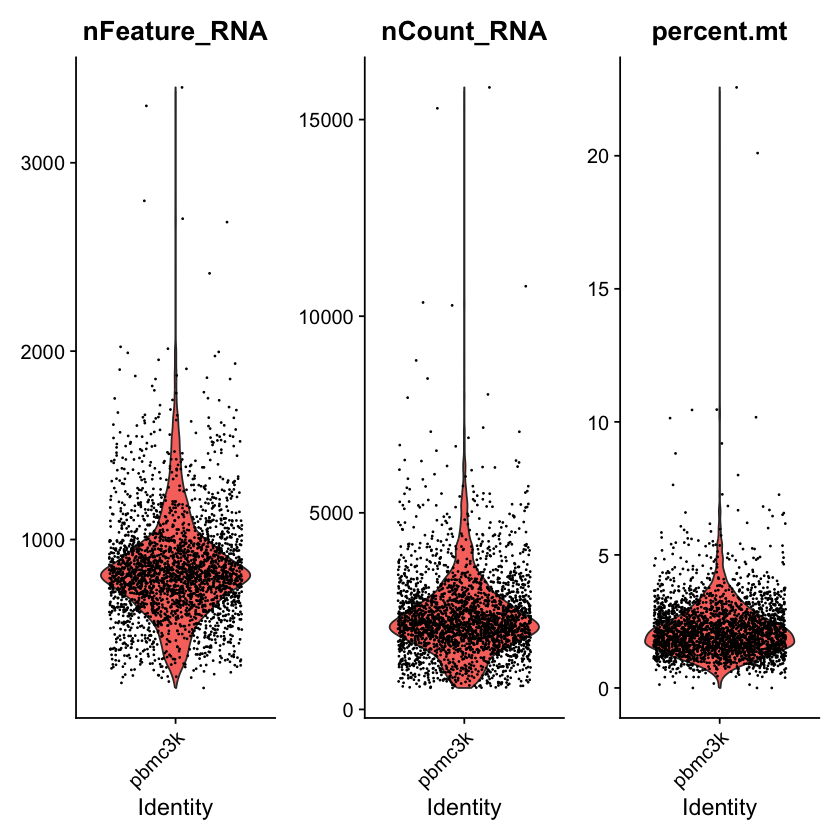

In [18]:
# Visualize QC metrics as a violin plot
VlnPlot(scseq, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

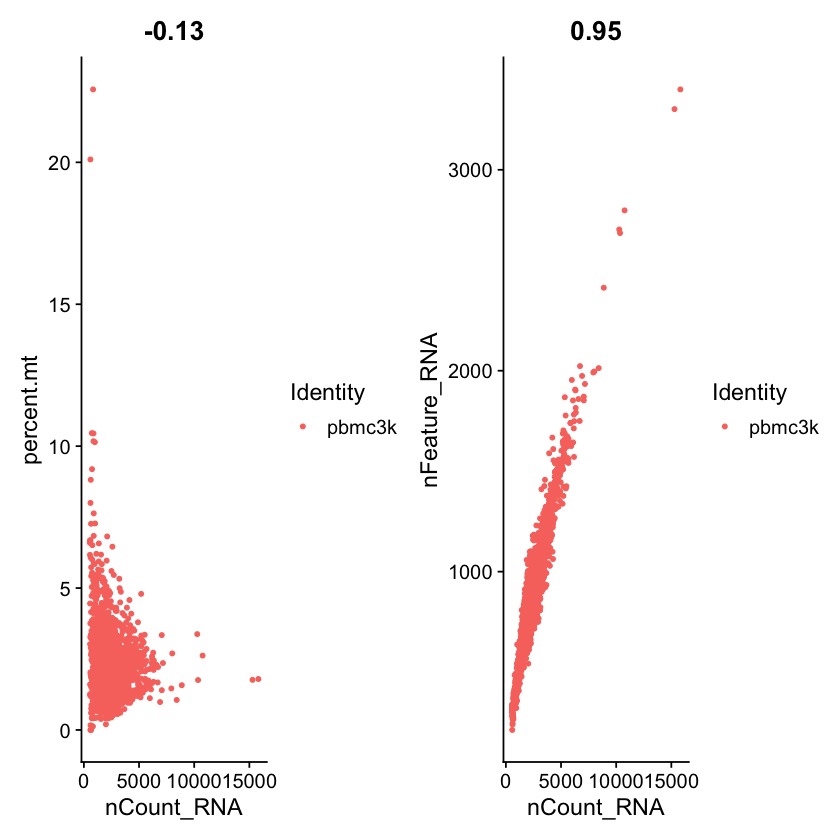

In [20]:
# FeatureScatter is typically used to visualize feature-feature relationships, but can be used
# for anything calculated by the object, i.e. columns in object metadata, PC scores etc.

plot1 <- FeatureScatter(scseq, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(scseq, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
plot1 + plot2

In [22]:
scseq <- subset(scseq, subset = nFeature_RNA > n_Feature_RNA_low & nFeature_RNA < n_Feature_RNA_high & percent.mt < percent_mt)

<div style="padding:20px; 
            color:#150d0a;
            margin:0px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color: #90EE90;
            overflow:hidden;
            font-weight:500;
            border-radius: 0;">
    Normalizing the data </div>
    <center>

In [25]:
scseq <- NormalizeData(scseq, normalization.method = normalize, scale.factor = scale_factor)

Normalizing layer: counts



<div style="padding:20px; 
            color:#150d0a;
            margin:0px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color: #90EE90;
            overflow:hidden;
            font-weight:500;
            border-radius: 0;">
    Feature Selection </div>
    <center>

Finding variable features for layer counts

When using repel, set xnudge and ynudge to 0 for optimal results

Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”
Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”


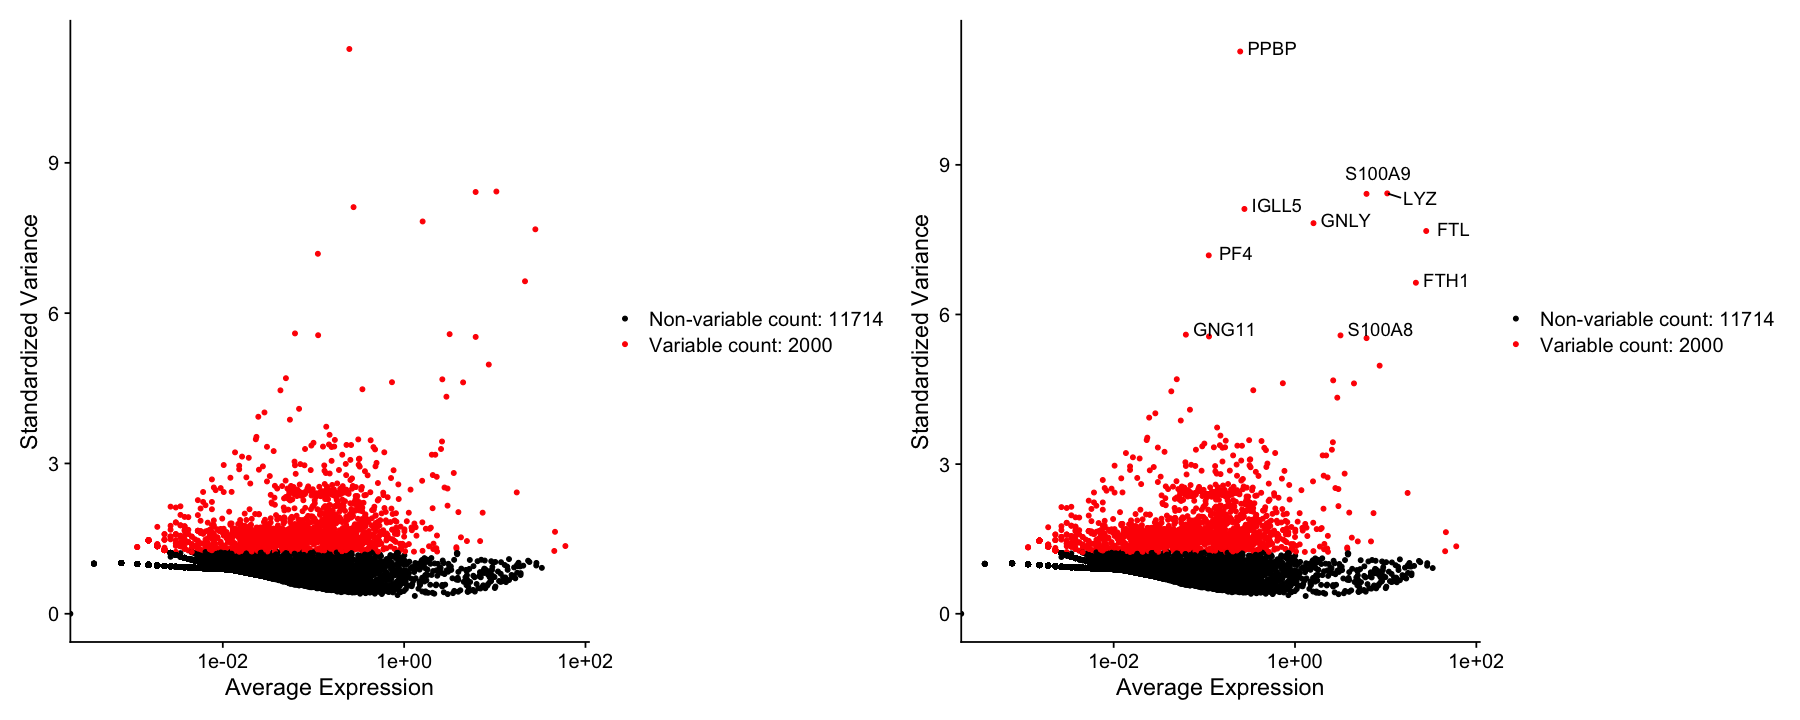

In [28]:
# First, specify the output plot size for Jupyter
options(repr.plot.width = 15, repr.plot.height = 6)

# Perform variable feature selection
scseq <- FindVariableFeatures(scseq, selection.method = "vst", nfeatures = n_features)

# Identify the 10 most highly variable genes
top_n <- head(VariableFeatures(scseq), topn)

# Plot variable features with and without labels
plot1 <- VariableFeaturePlot(scseq)
plot2 <- LabelPoints(plot = plot1, points = top_n, repel = TRUE)

# Combine the plots
final_plot <- plot1 + plot2

# Display the final plot (it should now have a better size)
print(final_plot)

<div style="padding:20px; 
            color:#150d0a;
            margin:0px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color: #90EE90;
            overflow:hidden;
            font-weight:500;
            border-radius: 0;">
    Scaling the data </div>
    <center>

In [34]:
all.genes <- rownames(scseq)
scseq <- ScaleData(scseq, features = all.genes)

Centering and scaling data matrix



<div style="padding:20px; 
            color:#150d0a;
            margin:0px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color: #90EE90;
            overflow:hidden;
            font-weight:500;
            border-radius: 0;">
    Perform linear dimensional reduction </div>
    <center>

In [41]:
scseq <- RunPCA(scseq, features = VariableFeatures(object = scseq))

PC_ 1 
Positive:  CST3, TYROBP, LST1, AIF1, FTL, FTH1, LYZ, FCN1, S100A9, TYMP 
	   FCER1G, CFD, LGALS1, S100A8, CTSS, LGALS2, SERPINA1, IFITM3, SPI1, CFP 
	   PSAP, IFI30, SAT1, COTL1, S100A11, NPC2, GRN, LGALS3, GSTP1, PYCARD 
Negative:  MALAT1, LTB, IL32, IL7R, CD2, B2M, ACAP1, CD27, STK17A, CTSW 
	   CD247, GIMAP5, AQP3, CCL5, SELL, TRAF3IP3, GZMA, MAL, CST7, ITM2A 
	   MYC, GIMAP7, HOPX, BEX2, LDLRAP1, GZMK, ETS1, ZAP70, TNFAIP8, RIC3 
PC_ 2 
Positive:  CD79A, MS4A1, TCL1A, HLA-DQA1, HLA-DQB1, HLA-DRA, LINC00926, CD79B, HLA-DRB1, CD74 
	   HLA-DMA, HLA-DPB1, HLA-DQA2, CD37, HLA-DRB5, HLA-DMB, HLA-DPA1, FCRLA, HVCN1, LTB 
	   BLNK, P2RX5, IGLL5, IRF8, SWAP70, ARHGAP24, FCGR2B, SMIM14, PPP1R14A, C16orf74 
Negative:  NKG7, PRF1, CST7, GZMB, GZMA, FGFBP2, CTSW, GNLY, B2M, SPON2 
	   CCL4, GZMH, FCGR3A, CCL5, CD247, XCL2, CLIC3, AKR1C3, SRGN, HOPX 
	   TTC38, APMAP, CTSC, S100A4, IGFBP7, ANXA1, ID2, IL32, XCL1, RHOC 
PC_ 3 
Positive:  HLA-DQA1, CD79A, CD79B, HLA-DQB1, HLA-DPB1, HLA-DPA

In [43]:
# Examine and visualize PCA results a few different ways
print(scseq[["pca"]], dims = 1:5, nfeatures = 5)

PC_ 1 
Positive:  CST3, TYROBP, LST1, AIF1, FTL 
Negative:  MALAT1, LTB, IL32, IL7R, CD2 
PC_ 2 
Positive:  CD79A, MS4A1, TCL1A, HLA-DQA1, HLA-DQB1 
Negative:  NKG7, PRF1, CST7, GZMB, GZMA 
PC_ 3 
Positive:  HLA-DQA1, CD79A, CD79B, HLA-DQB1, HLA-DPB1 
Negative:  PPBP, PF4, SDPR, SPARC, GNG11 
PC_ 4 
Positive:  HLA-DQA1, CD79B, CD79A, MS4A1, HLA-DQB1 
Negative:  VIM, IL7R, S100A6, IL32, S100A8 
PC_ 5 
Positive:  GZMB, NKG7, S100A8, FGFBP2, GNLY 
Negative:  LTB, IL7R, CKB, VIM, MS4A7 


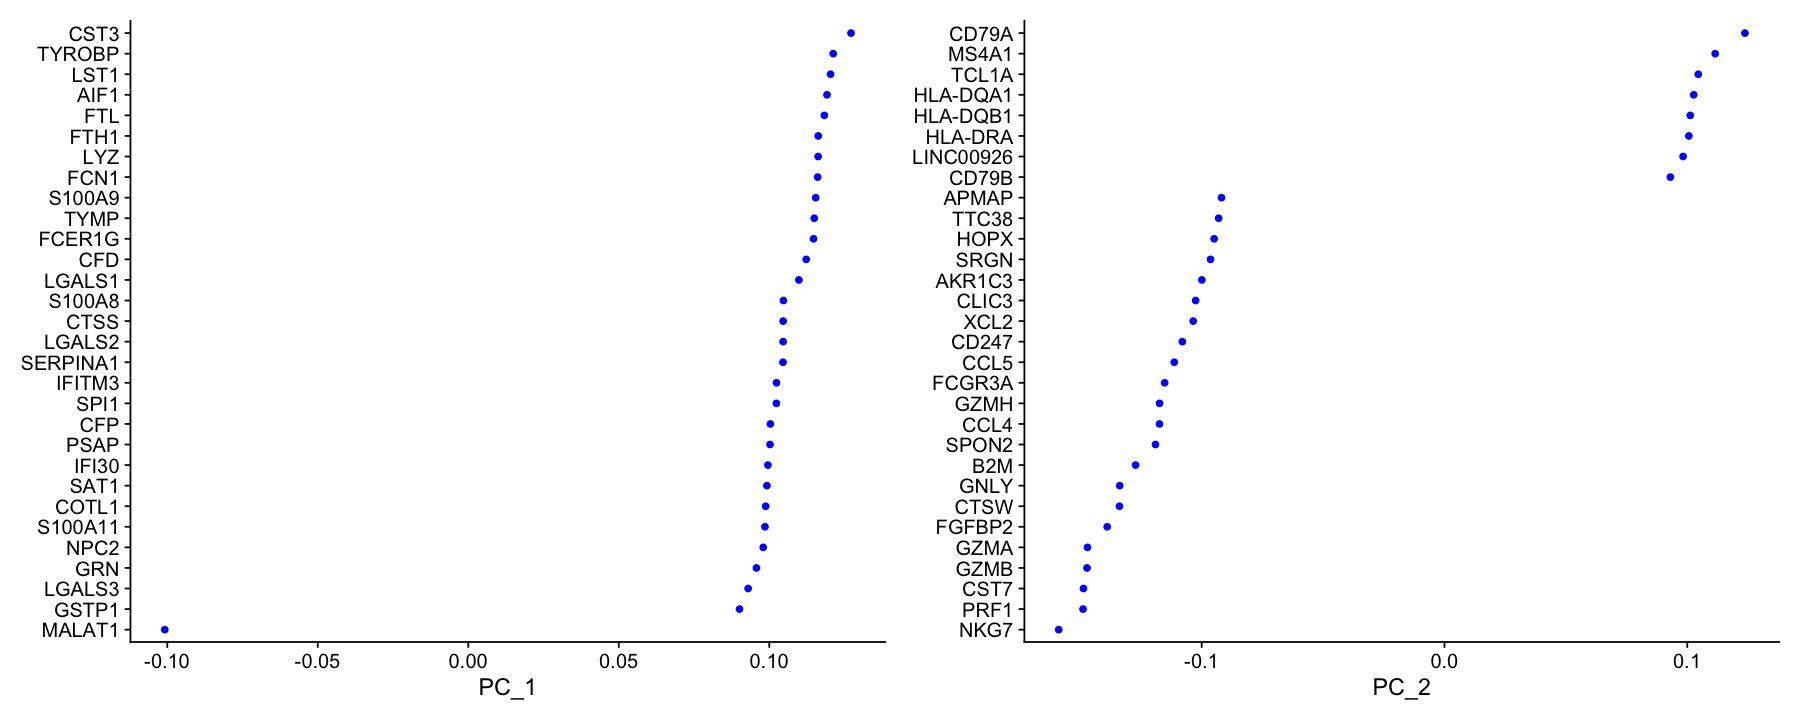

In [45]:
VizDimLoadings(scseq, dims = 1:2, reduction = "pca")

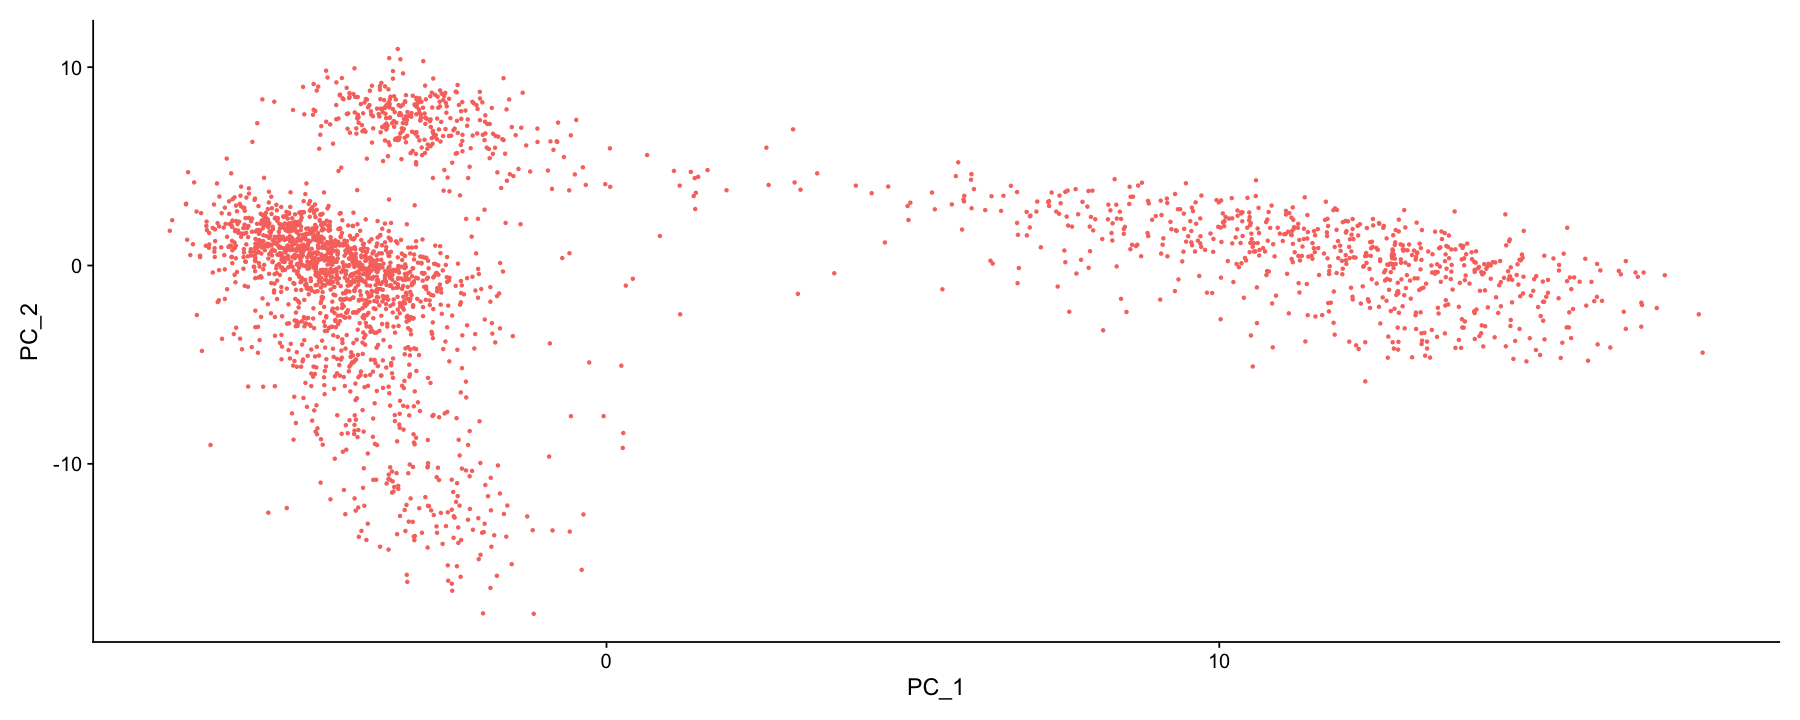

In [47]:
DimPlot(scseq, reduction = "pca") + NoLegend()

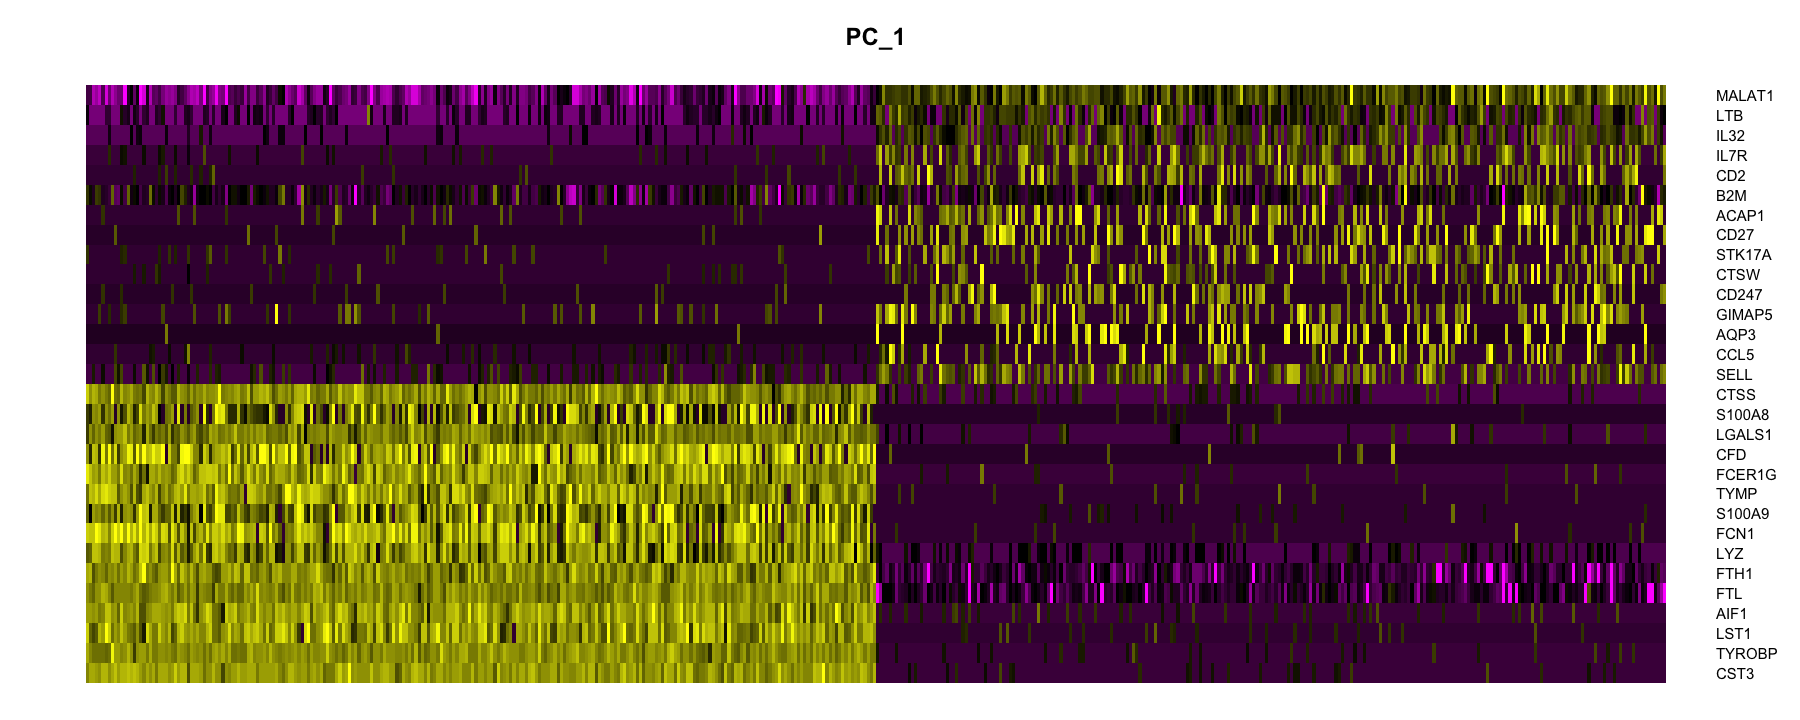

In [49]:
DimHeatmap(scseq, dims = 1, cells = 500, balanced = TRUE)

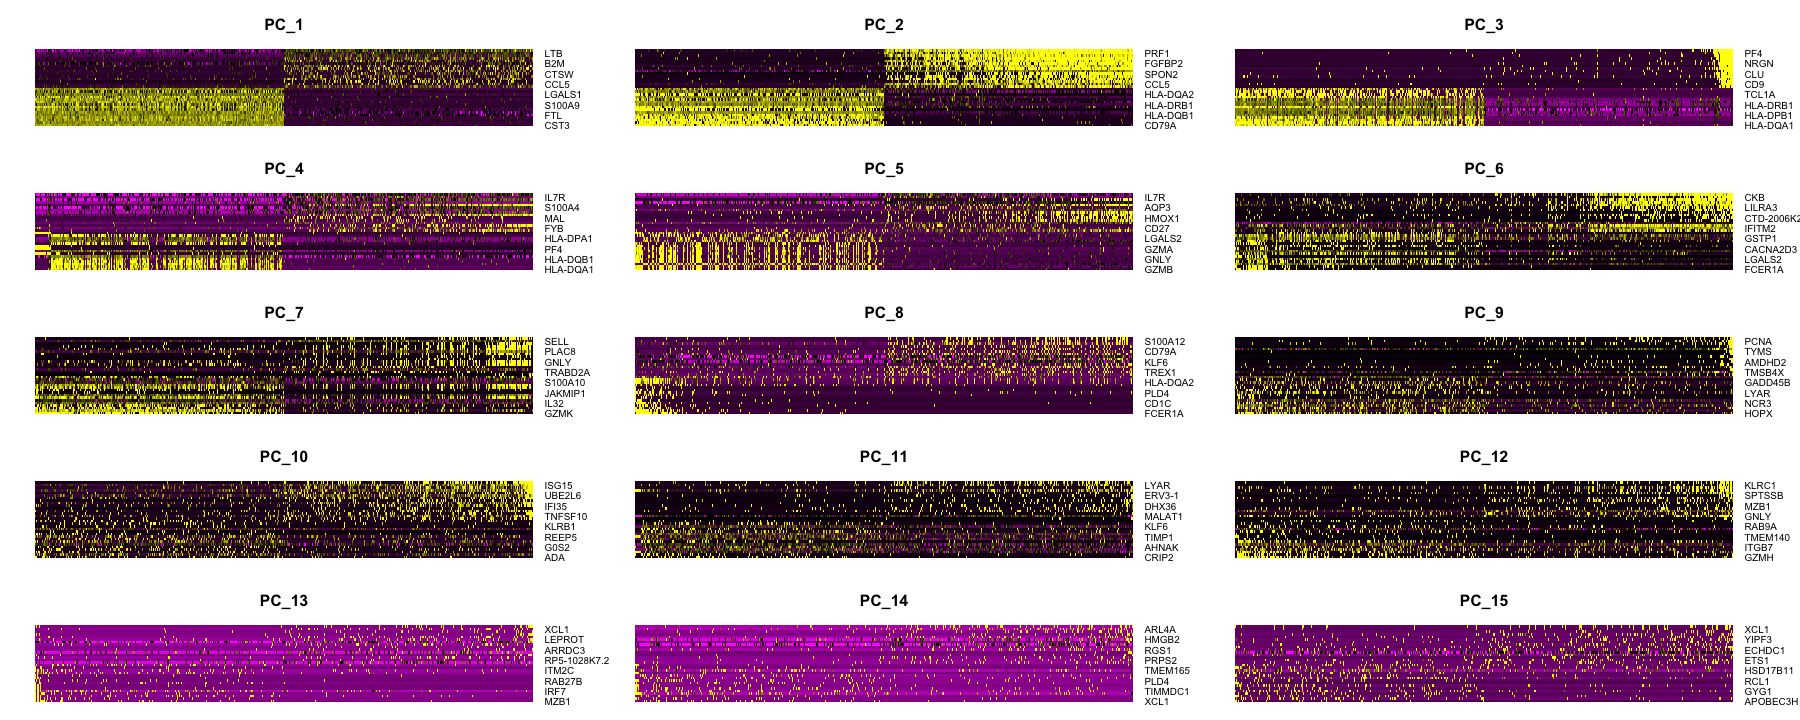

In [51]:
DimHeatmap(scseq, dims = 1:15, cells = 500, balanced = TRUE)

<div style="padding:20px; 
            color:#150d0a;
            margin:0px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color: #90EE90;
            overflow:hidden;
            font-weight:500;
            border-radius: 0;">
    Determine the ‘dimensionality’ of the dataset </div>
    <center>

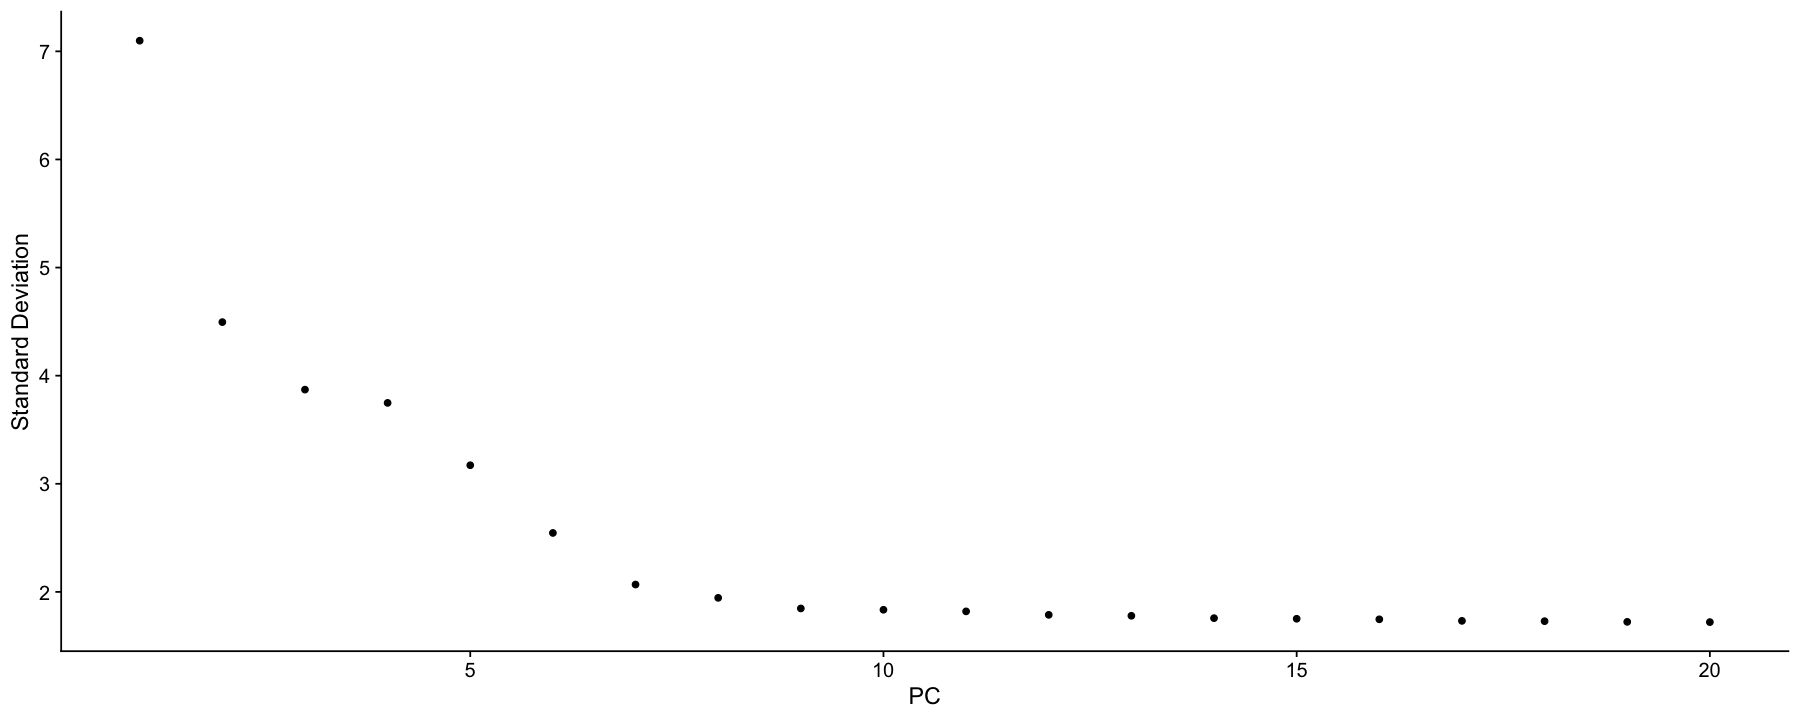

In [53]:
ElbowPlot(scseq)

<div style="padding:20px; 
            color:#150d0a;
            margin:0px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color: #90EE90;
            overflow:hidden;
            font-weight:500;
            border-radius: 0;">
    Cluster the cells </div>
    <center>

In [58]:
scseq <- FindNeighbors(scseq, dims = 1:10)
scseq <- FindClusters(scseq, resolution = 0.5)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2638
Number of edges: 95927

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8728
Number of communities: 9
Elapsed time: 0 seconds


In [60]:
# Look at cluster IDs of the first 5 cells
head(Idents(scseq), 5)

AAACATACAACCAC-1 AAACATTGAGCTAC-1 AAACATTGATCAGC-1 AAACCGTGCTTCCG-1 
               2                3                2                1 
AAACCGTGTATGCG-1 
               6 
Levels: 0 1 2 3 4 5 6 7 8

19:42:52 UMAP embedding parameters a = 0.9922 b = 1.112

19:42:52 Read 2638 rows and found 10 numeric columns

19:42:52 Using Annoy for neighbor search, n_neighbors = 30

19:42:52 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

19:42:52 Writing NN index file to temp file /var/folders/83/5zmj3k997tj3k4wsb646v2v80000gn/T//RtmpWpOMQu/file54a6279ff72f

19:42:52 Searching Annoy index using 1 thread, search_k = 3000

19:42:53 Annoy recall = 100%

19:42:53 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

19:42:53 Initializing from normalized Laplacian + noise (using RSpectra)

19:42:53 Commencing optimization for 500 epochs, with 105140 positive edges

19:42:55 Optimization finished



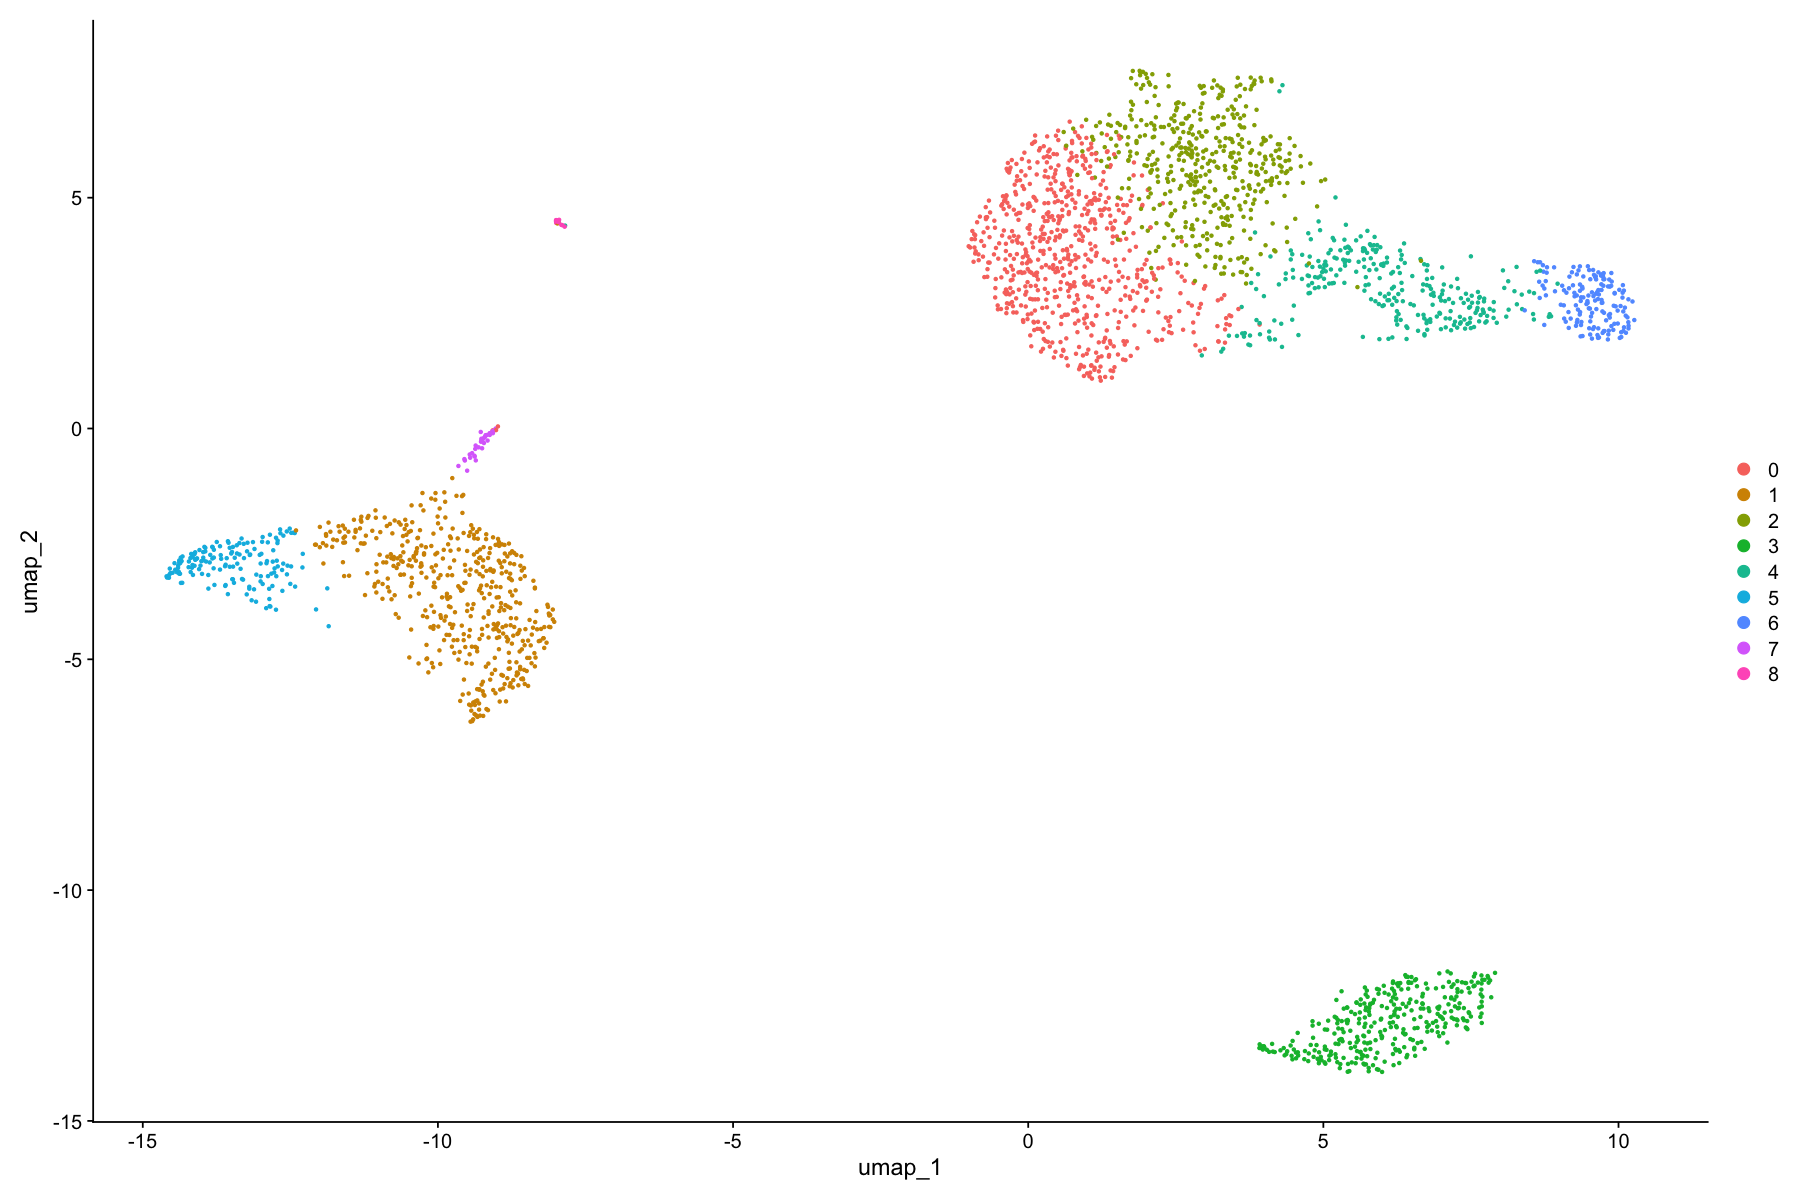

In [132]:
# Set the plot size for the next plot
options(repr.plot.width = 15, repr.plot.height = 10)


scseq <- RunUMAP(scseq, dims = 1:10)
# note that you can set `label = TRUE` or use the LabelClusters function to help label
# individual clusters
DimPlot(scseq, reduction = "umap")

In [80]:
#save the data to avoid recalculations 

saveRDS(scseq, file = "/Users/freddymappin/Desktop/BioinformaticHub/SingleCell2/pbmc_tutorial.rds")

<div style="padding:20px; 
            color:#150d0a;
            margin:0px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color: #90EE90;
            overflow:hidden;
            font-weight:500;
            border-radius: 0;">
    Finding differentially expressed features </div>
    <center>

In [85]:
# find all markers of cluster 2
cluster2.markers <- FindMarkers(scseq, ident.1 = 2)
head(cluster2.markers, n = 5)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
IL32,2.892340e-90,1.3070772,0.947,0.465,3.966555e-86
LTB,1.060121e-86,1.3312674,0.981,0.643,1.453850e-82
CD3D,8.794641e-71,1.0597620,0.922,0.432,1.206097e-66
IL7R,3.516098e-68,1.4377848,0.750,0.326,4.821977e-64
LDHB,1.642480e-67,0.9911924,0.954,0.614,2.252497e-63


In [87]:
# find all markers distinguishing cluster 5 from clusters 0 and 3
cluster5.markers <- FindMarkers(scseq, ident.1 = 5, ident.2 = c(0, 3))
head(cluster5.markers, n = 5)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FCGR3A,8.246578e-205,6.794969,0.975,0.040,1.130936e-200
IFITM3,1.677613e-195,6.192558,0.975,0.049,2.300678e-191
CFD,2.401156e-193,6.015172,0.938,0.038,3.292945e-189
CD68,2.900384e-191,5.530330,0.926,0.035,3.977587e-187
RP11-290F20.3,2.513244e-186,6.297999,0.840,0.017,3.446663e-182


In [89]:
# find markers for every cluster compared to all remaining cells, report only the positive
# ones
pbmc.markers <- FindAllMarkers(scseq, only.pos = TRUE)
pbmc.markers %>%
    group_by(cluster) %>%
    dplyr::filter(avg_log2FC > 1)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8



p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
3.746131e-112,1.206019,0.912,0.592,5.137444e-108,0,LDHB
9.571984e-88,2.397366,0.447,0.108,1.312702e-83,0,CCR7
1.154695e-76,1.064113,0.845,0.406,1.583548e-72,0,CD3D
1.122405e-54,1.043529,0.731,0.400,1.539267e-50,0,CD3E
1.354319e-51,2.136530,0.342,0.103,1.857312e-47,0,LEF1
1.942957e-47,1.198913,0.629,0.359,2.664571e-43,0,NOSIP
2.806087e-44,1.526200,0.443,0.185,3.848268e-40,0,PIK3IP1
6.269443e-43,1.985307,0.330,0.112,8.597914e-39,0,PRKCQ-AS1
1.161169e-40,2.696721,0.200,0.040,1.592427e-36,0,FHIT


In [91]:
cluster0.markers <- FindMarkers(scseq, ident.1 = 0, logfc.threshold = 0.25, test.use = "roc", only.pos = TRUE)

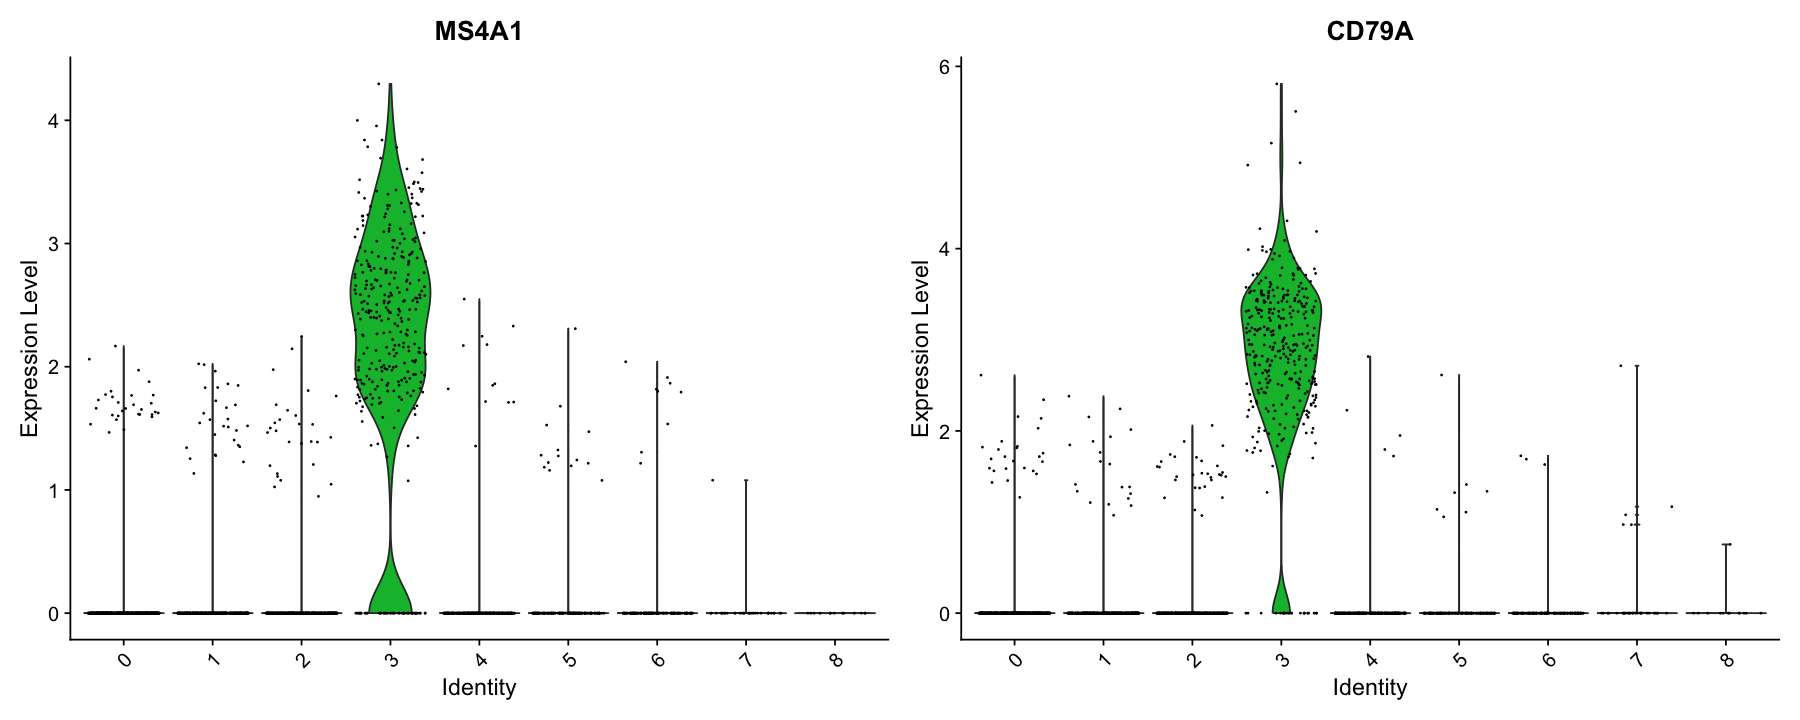

In [95]:
VlnPlot(scseq, features = c("MS4A1", "CD79A"))

Warning message:
“The `slot` argument of `VlnPlot()` is deprecated as of Seurat 5.0.0.
ℹ Please use the `layer` argument instead.”


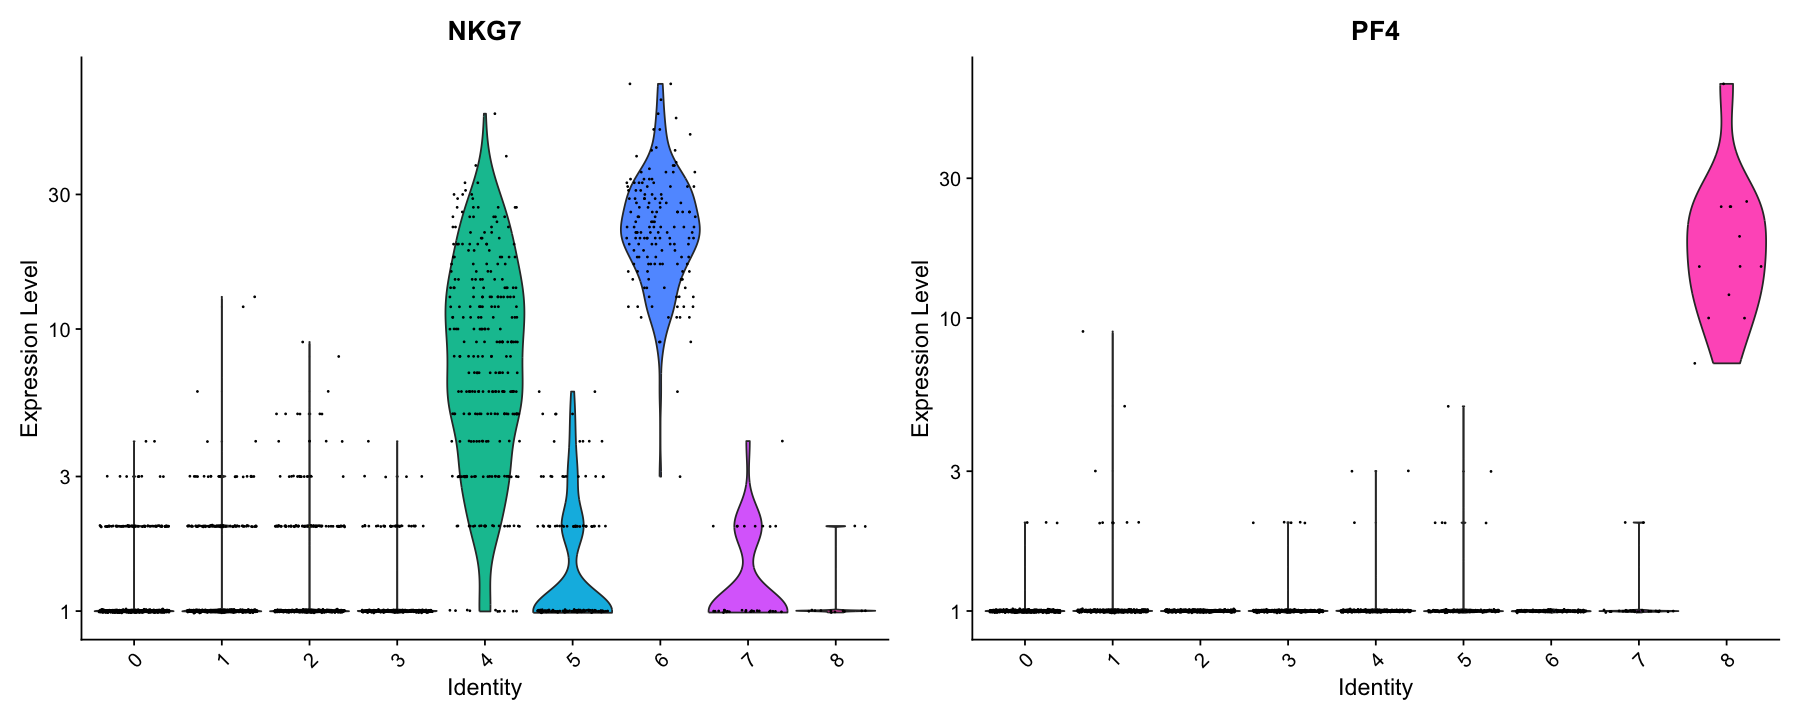

In [97]:
# you can plot raw counts as well
VlnPlot(scseq, features = c("NKG7", "PF4"), slot = "counts", log = TRUE)

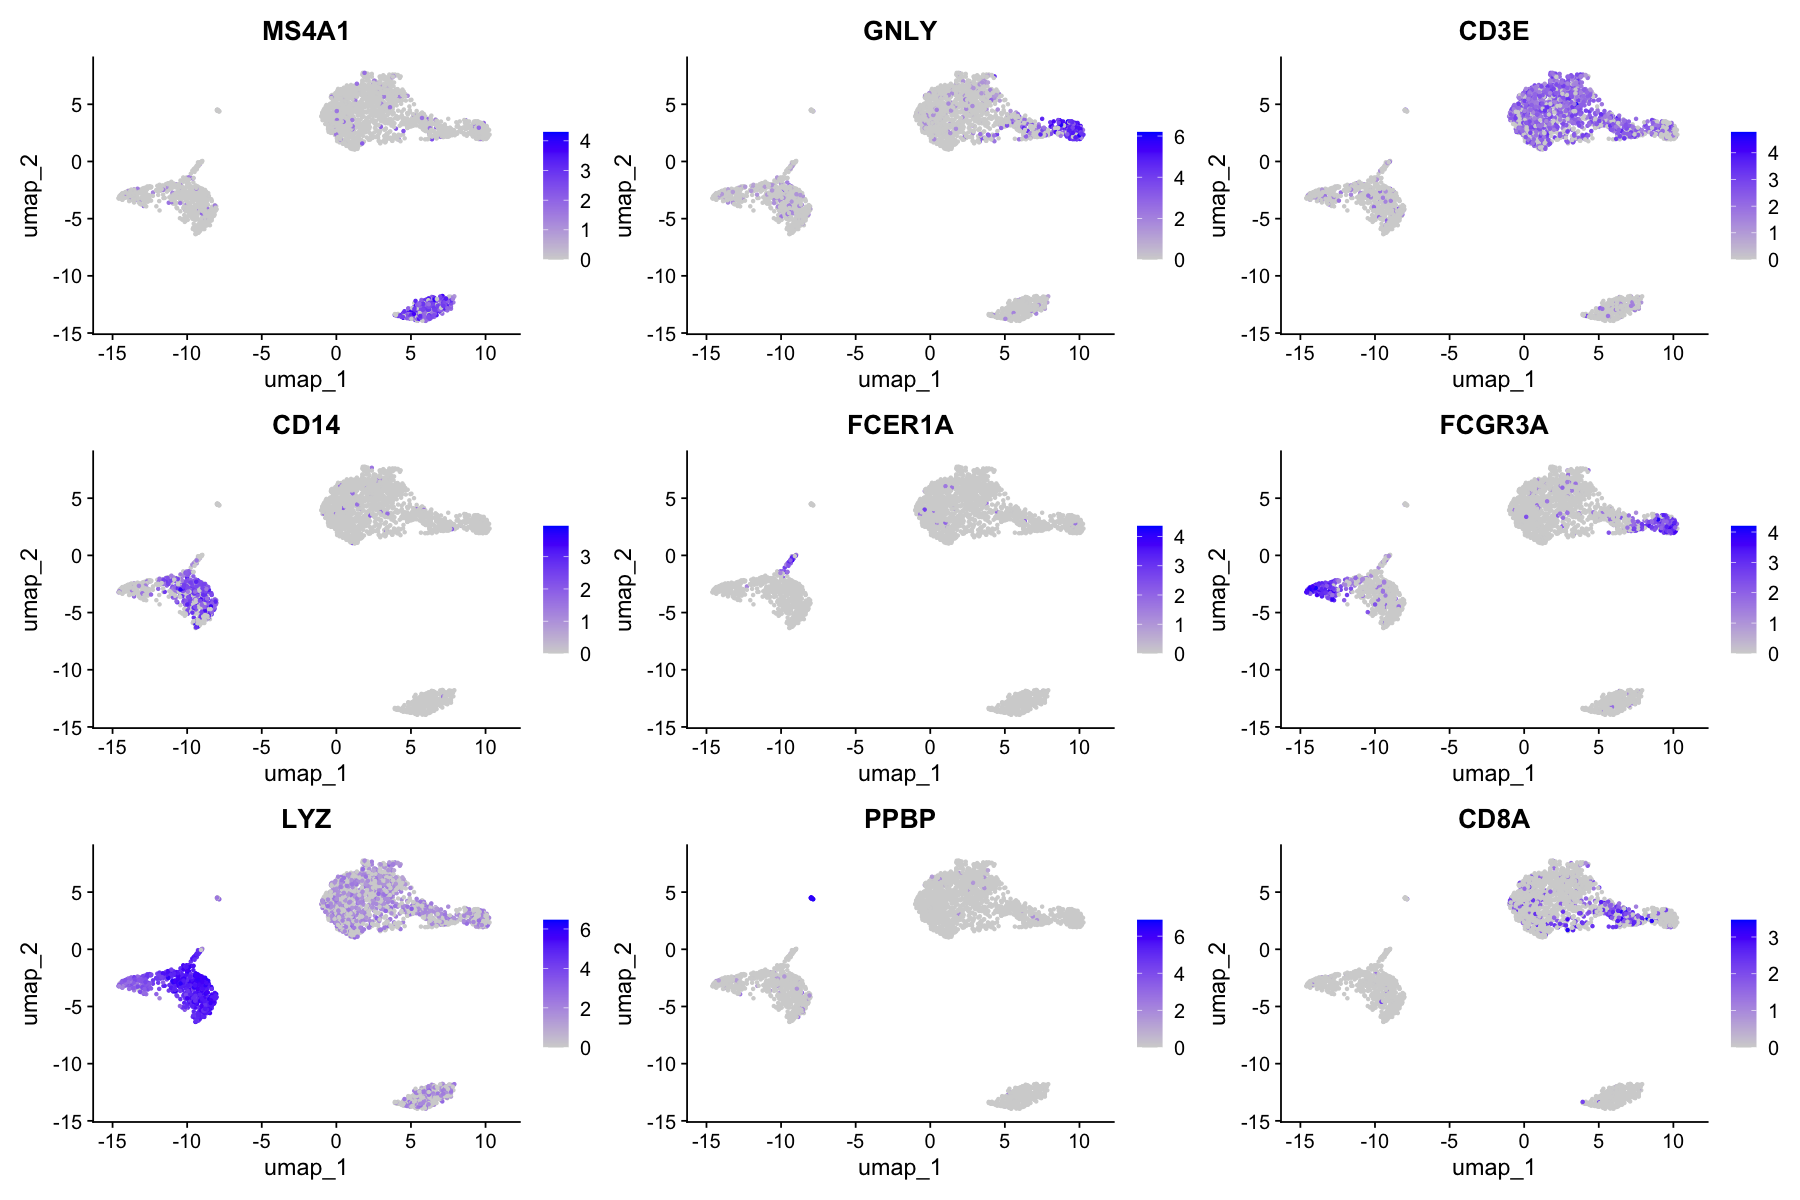

In [130]:
# Set the plot size for the next plot
options(repr.plot.width = 15, repr.plot.height = 10)

# Generate the heatmap with the specified size
FeaturePlot(scseq, features = c("MS4A1", "GNLY", "CD3E", "CD14", "FCER1A", "FCGR3A", "LYZ", "PPBP",
    "CD8A"))

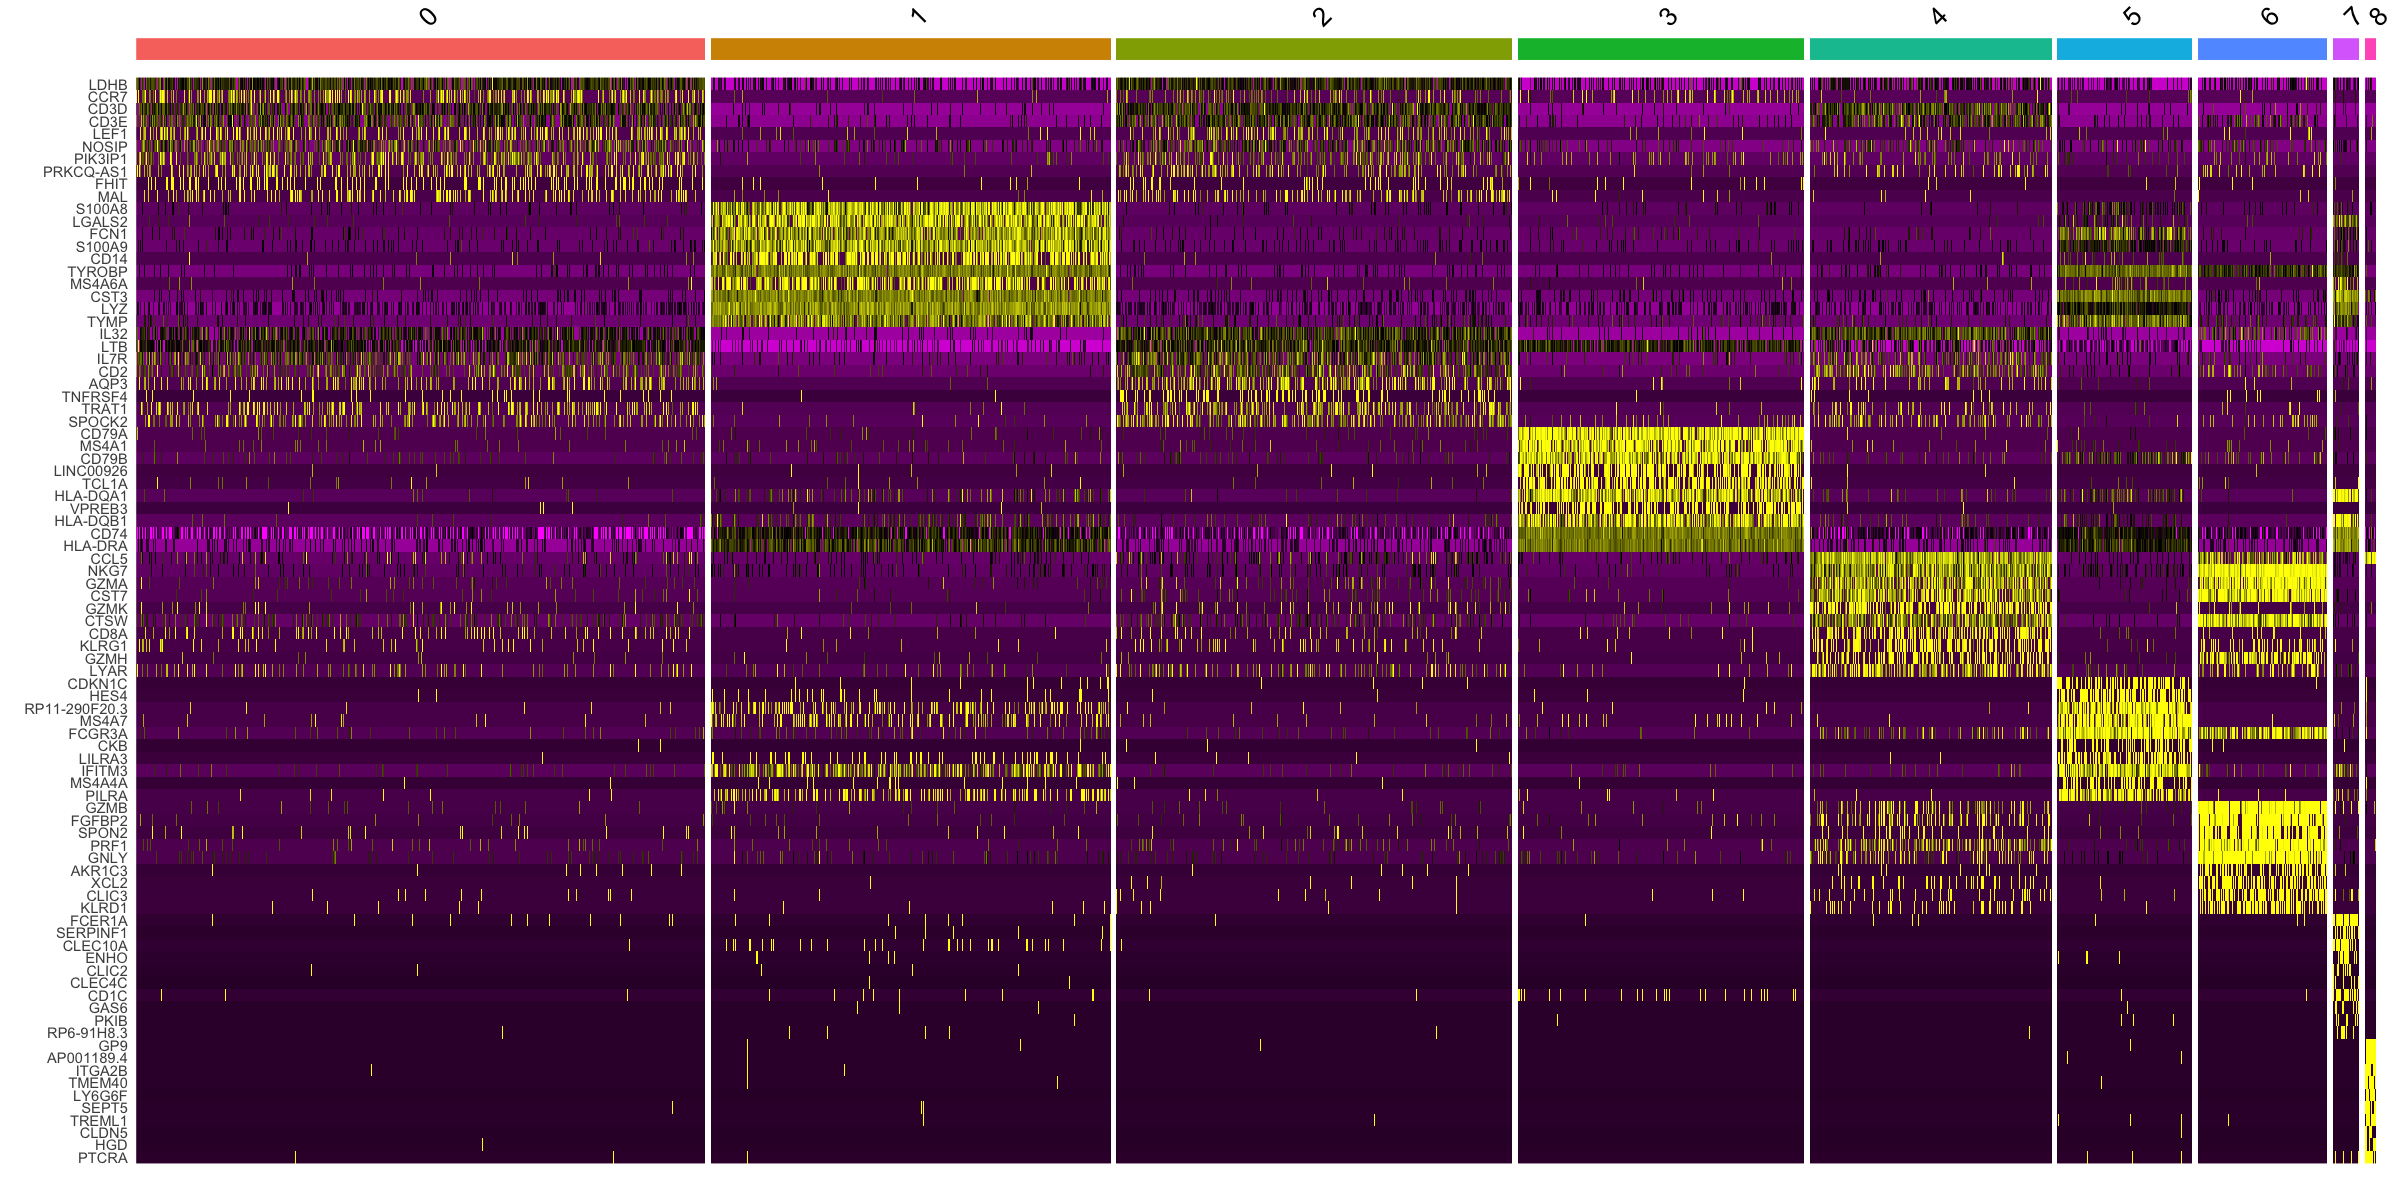

In [124]:
# Set the plot size for the next plot
options(repr.plot.width = 20, repr.plot.height = 10)

# Create your top10 dataframe
pbmc.markers %>%
  group_by(cluster) %>%
  dplyr::filter(avg_log2FC > 1) %>%
  slice_head(n = 10) %>%
  ungroup() -> top10

# Generate the heatmap with the specified size
DoHeatmap(scseq, features = top10$gene) + NoLegend()

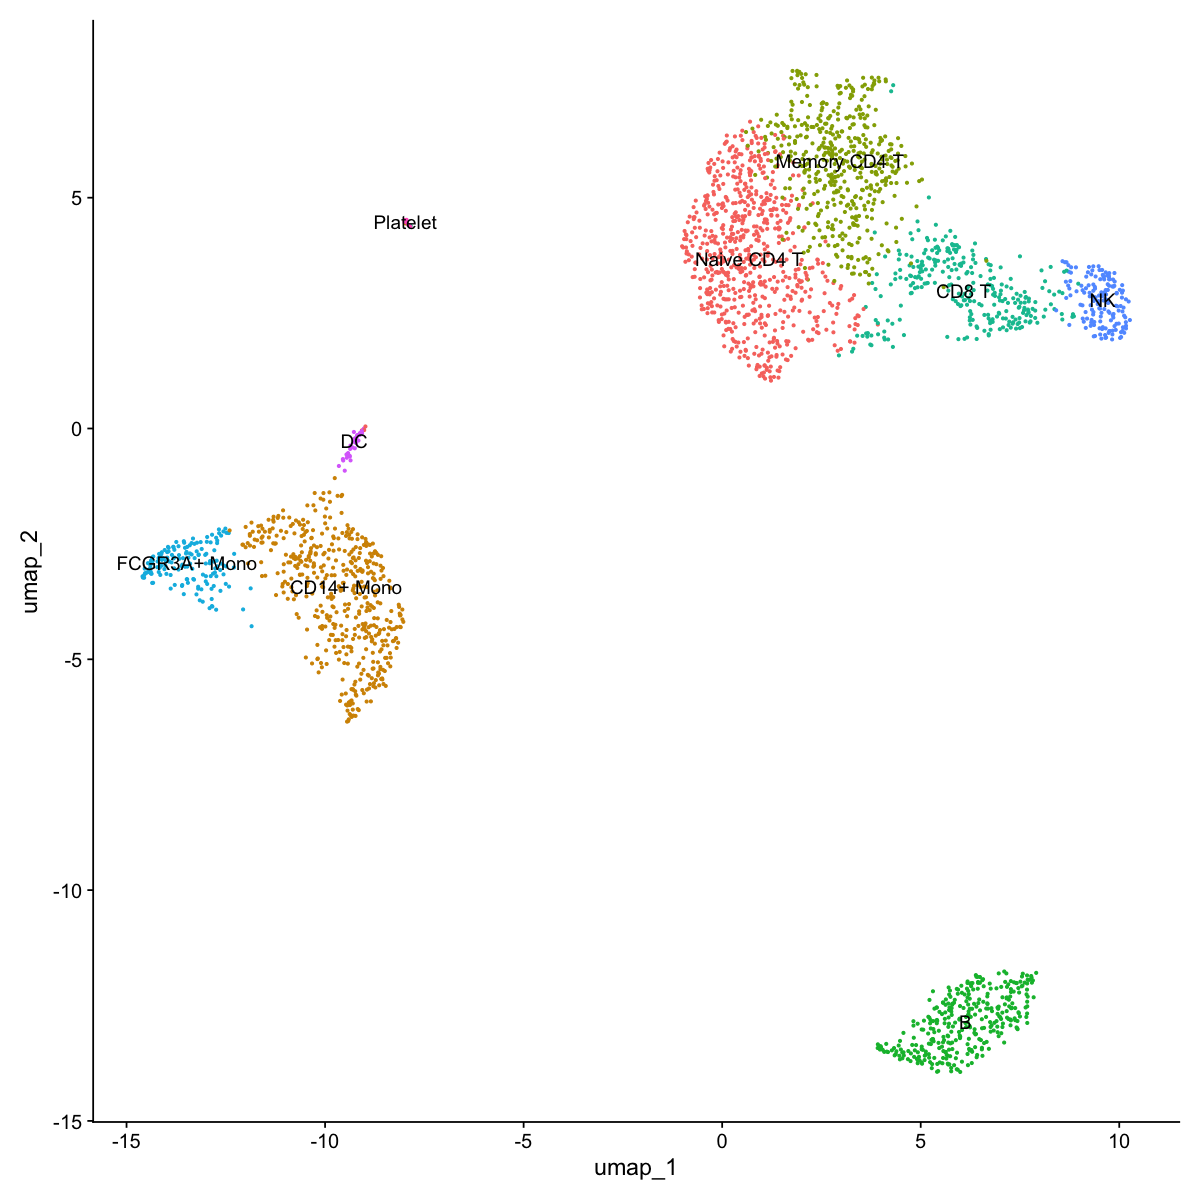

In [146]:
# Set the plot size for the next plot
options(repr.plot.width = 10, repr.plot.height = 10)


new.cluster.ids <- c("Naive CD4 T", "CD14+ Mono", "Memory CD4 T", "B", "CD8 T", "FCGR3A+ Mono",
    "NK", "DC", "Platelet")
names(new.cluster.ids) <- levels(scseq)
scseq <- RenameIdents(scseq, new.cluster.ids)
DimPlot(scseq, reduction = "umap", label = TRUE, pt.size = 0.5) + NoLegend()

In [152]:
library(ggplot2)
plot <- DimPlot(scseq, reduction = "umap", label = TRUE, label.size = 4.5) + xlab("UMAP 1") + ylab("UMAP 2") +
    theme(axis.title = element_text(size = 18), legend.text = element_text(size = 18)) + guides(colour = guide_legend(override.aes = list(size = 10)))
ggsave(filename = "/Users/freddymappin/Desktop/BioinformaticHub/SingleCell2/pbmc3k_umap.jpg", height = 7, width = 12, plot = plot, quality = 50)

In [154]:
saveRDS(scseq, file = "/Users/freddymappin/Desktop/BioinformaticHub/SingleCell2/pbmc3k_final.rds")